# Problem Set 2

### Authors: Anita Mezzetti, Franceso Maizza, Hien Lê, Nataliia Surianinova, Zafer Kocaoglu

In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_validate

#### Problem:
After preparing data, you are now facing the first real "data science" problem in the telecom
company. Understanding customer churn is essential to keep costs down, so your supervisor has
asked to develop a model (or a set of models) to predict customer behavior. Your boss knows that
previous employees posted solutions to this problem online... and he won’t be too happy to see you
replicate the same results as previous employees... he fired them for a reason ;-). Prepare a report
predicting costumer churn.

## 1) Data Arrangements

First of all we fill the missing values and arrange data in a way that we can use in algorithms;

In [2]:
CustomerData = pd.read_csv (r'customers.csv') 
print(CustomerData.shape)
print(CustomerData.dtypes)
CustomerData.head()


(7043, 21)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
CustomerData['TotalCharges']=CustomerData['TotalCharges'].replace(" ",CustomerData.tenure*CustomerData.MonthlyCharges).astype('float64')
CustomerData['SeniorCitizen']=CustomerData['SeniorCitizen'].astype('object')

In [4]:
CustomerData.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
CustomerData1 = CustomerData.drop(columns=['customerID'])

Here, we turn object variables into binary integer variables to use them in regression algorithms;

In [6]:
CustomerData1['gender'] = CustomerData1['gender'].map({'Female': 0, 'Male': 1}).astype('int64')
CustomerData1['Partner'] = CustomerData1['Partner'].map({'No': 0, 'Yes': 1}).astype('int64')
CustomerData1['Dependents'] = CustomerData1['Dependents'].map({'No': 0, 'Yes': 1}).astype('int64')
CustomerData1['PhoneService'] = CustomerData1['PhoneService'].map({'No': 0, 'Yes': 1}).astype('int64')
CustomerData1['MultipleLines'] = CustomerData1['MultipleLines'].map({'No': 0,'No phone service':0 ,'Yes': 1}).astype('int64')
CustomerData1['OnlineSecurity'] = CustomerData1['OnlineSecurity'].map({'No': 0,'No internet service':0 , 'Yes': 1}).astype('int64')
CustomerData1['OnlineBackup'] = CustomerData1['OnlineBackup'].map({'No': 0,'No internet service':0 , 'Yes': 1}).astype('int64')
CustomerData1['DeviceProtection'] = CustomerData1['DeviceProtection'].map({'No': 0,'No internet service':0 , 'Yes': 1}).astype('int64')
CustomerData1['TechSupport'] = CustomerData1['TechSupport'].map({'No': 0,'No internet service':0 , 'Yes': 1}).astype('int64')
CustomerData1['StreamingTV'] = CustomerData1['StreamingTV'].map({'No': 0,'No internet service':0 , 'Yes': 1}).astype('int64')
CustomerData1['StreamingMovies'] = CustomerData1['StreamingMovies'].map({'No': 0,'No internet service':0 , 'Yes': 1}).astype('int64')
CustomerData1['PaperlessBilling'] = CustomerData1['PaperlessBilling'].map({'No': 0, 'Yes': 1}).astype('int64')
CustomerData1['Churn'] = CustomerData1['Churn'].map({'No': 0, 'Yes': 1}).astype('int64')
CustomerData1['SeniorCitizen']=CustomerData1['SeniorCitizen'].astype('int64')

We create dummy variables for the objects that have more than 2 options;

In [7]:
CustomerData2=pd.get_dummies(CustomerData1, columns=['InternetService','Contract','PaymentMethod'])

In [8]:
CustomerData2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

Lastly, for dummy variables we need n-1 columns for regression models. Hence, we delete extra columns;

In [9]:
CustomerData3= CustomerData2.drop(columns=['InternetService_No','Contract_Two year','PaymentMethod_Mailed check'])

In [10]:
CustomerData3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,1,0,0,0,1
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,0,1,0,0,0
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,1,0,0,0,0
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,0,1,1,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,1,0,0,0,1


## 2) Model Fitting and Hyperparameter Tuning

First of all, we try 6 different binary classification algorithms after splitting data as 70% training and 30% test. While applying models, we also tune hyperparameters. Moreover, during hyperparameter tuning, we crossvalidate training data so that we don't overfit.

In [11]:
X = CustomerData3.drop(columns=['Churn'])
Y = CustomerData3['Churn']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=20)
StSc = StandardScaler()
X_train_Sc = StSc.fit_transform(X_train)
X_test_Sc = StSc.transform(X_test)
X_train_Scaled=pd.DataFrame(data=X_train_Sc,  columns=X_train.columns)
X_test_Scaled=pd.DataFrame(data=X_test_Sc,  columns=X_test.columns)
print(X_train_Scaled.shape)
print(X_test_Scaled.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 23)
(2113, 23)
(4930,)
(2113,)


### 2.1) Logistic Regression

First of all, we try to tune our hyperparameter C by using different C values and crossvalidating it with seperating training set to 5 pieces and each turn using one as test and other 4 as training sets. Thus, we reduce the risk of overfitting and find the most suitable hyperparameter for Logistic Regression.

In [13]:
LogRegOptimalAcc=0
C_List=[0.001,0.01,0.1,1,10,100,1000]

#measures = ['accuracy', 'precision', 'recall', 'roc_auc']
for i in range(len(C_List)):
    LogReg = LogisticRegression(penalty = 'l1', C = C_List[i],solver='liblinear')
    measurement = cross_validate(LogReg, X_train_Scaled, y_train, scoring='accuracy', cv=5)
    if (measurement['test_score'].mean() > LogRegOptimalAcc):
        LogRegOptimalAcc = measurement['test_score'].mean()
        OptimalC=C_List[i]


print('Optimal value for hyperparameter C =',OptimalC)
print('Mean Accuracy score of Logistic Regression with Optimal C =',LogRegOptimalAcc)

Optimal value for hyperparameter C = 100
Mean Accuracy score of Logistic Regression with Optimal C = 0.8052775839937368


In [14]:
LogReg = LogisticRegression(penalty = 'l1', C = OptimalC,solver='liblinear')
LogReg.fit(X_train_Scaled,y_train)
    
y_pred_LogReg = LogReg.predict(X_test_Scaled)
LogRegTestScore= accuracy_score(y_pred_LogReg,y_test)
LogRegTrainScore= LogReg.score(X_train_Scaled,y_train)
print('Logistic Regression (C= %d) Accuracy on Training set = %f'%(OptimalC,LogRegTrainScore))
print('Logistic Regression (C= %d) Accuracy on Test set = %f'%(OptimalC ,LogRegTestScore))

Logistic Regression (C= 100) Accuracy on Training set = 0.808519
Logistic Regression (C= 100) Accuracy on Test set = 0.808329


### 2.2) Decision Tree Classifier

In [15]:
DTOptimalAcc=0
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]

for i in range(100,0,-3):
    for j in DTSplitList:
        for k in DTLeafList:
            DecTree = DecisionTreeClassifier(max_depth=i, min_samples_split=j, min_samples_leaf=k)
            measurement = cross_validate(DecTree, X_train_Scaled, y_train, scoring='accuracy', cv=5)
            if (measurement['test_score'].mean() >= DTOptimalAcc):
                DTOptimalAcc = measurement['test_score'].mean()
                DTOptDepth=i
                DTOptMinSplit=j
                DTOptMinLeaf=k

print('Optimal value for hyperparameter max_depth=',DTOptDepth)
print('Optimal value for hyperparameter min_samples_split=',DTOptMinSplit)
print('Optimal value for hyperparameter min_samples_leaf=',DTOptMinLeaf)
print('Mean Accuracy score of Decision Tree Classifier with Optimal Hyperparameters =',DTOptimalAcc)

Optimal value for hyperparameter max_depth= 7
Optimal value for hyperparameter min_samples_split= 0.05
Optimal value for hyperparameter min_samples_leaf= 0.025
Mean Accuracy score of Decision Tree Classifier with Optimal Hyperparameters = 0.7947362854180782


In [16]:
DecTree = DecisionTreeClassifier(max_depth=DTOptDepth, min_samples_split=DTOptMinSplit, min_samples_leaf=DTOptMinLeaf)
DecTree.fit(X_train_Scaled,y_train)
    
y_pred_DecTree = DecTree.predict(X_test_Scaled)
DecTreeTestScore= accuracy_score(y_pred_DecTree,y_test)
DecTreeTrainScore= DecTree.score(X_train_Scaled,y_train)
print('Decision Tree Accuracy on Training set = %f'%DecTreeTrainScore)
print('Decision Tree Accuracy on Test set = %f'%DecTreeTestScore)

Decision Tree Accuracy on Training set = 0.804462
Decision Tree Accuracy on Test set = 0.797444


### 2.3) Random Forest Classifier

In [17]:
RFOptimalAcc=0
RFLeafList=[0.005,0.025,0.05,0.1,0.25]
RFEstimatorList=[10,20,30,40,50,100]

for i in range(50,0,-5):
    for k in RFLeafList:
        for l in RFEstimatorList:
            RanFor = RandomForestClassifier(n_estimators=l,max_depth=i, min_samples_leaf=k,random_state=50)
            measurement = cross_validate(RanFor, X_train_Scaled, y_train, scoring='accuracy', cv=5)
            if (measurement['test_score'].mean() >= RFOptimalAcc):
                RFOptimalAcc = measurement['test_score'].mean()
                RFOptDepth=i
                RFOptMinLeaf=k
                RFOptEstimator=l

print('Optimal value for hyperparameter max_depth=',RFOptDepth)
print('Optimal value for hyperparameter min_samples_leaf=',RFOptMinLeaf)
print('Optimal value for hyperparameter n_estimators=',RFOptEstimator)
print('Mean Accuracy score of Random Forest Classifier with Optimal Hyperparameters =',RFOptimalAcc)

Optimal value for hyperparameter max_depth= 10
Optimal value for hyperparameter min_samples_leaf= 0.005
Optimal value for hyperparameter n_estimators= 100
Mean Accuracy score of Random Forest Classifier with Optimal Hyperparameters = 0.8060895599716027


In [18]:
RanFor = RandomForestClassifier(n_estimators=RFOptEstimator,max_depth=RFOptDepth, min_samples_leaf=RFOptMinLeaf,random_state=50)
RanFor.fit(X_train_Scaled,y_train)
    
y_pred_RanFor = RanFor.predict(X_test_Scaled)
RanForTestScore= accuracy_score(y_pred_RanFor,y_test)
RanForTrainScore= RanFor.score(X_train_Scaled,y_train)
print('Random Forest Classifier Accuracy on Training set = %f'%RanForTrainScore)
print('Random Forest Classifier Accuracy on Test set = %f'%RanForTestScore)

Random Forest Classifier Accuracy on Training set = 0.818458
Random Forest Classifier Accuracy on Test set = 0.799811


### 2.4) KNN Classifier

In [19]:
KNNOptimalAcc=0
Neighbor_List=[3,5,10,20,50,100]

for i in range(len(Neighbor_List)):
    KNN = KNeighborsClassifier(n_neighbors=Neighbor_List[i])
    measurement = cross_validate(KNN, X_train_Scaled, y_train, scoring='accuracy', cv=5)
    if (measurement['test_score'].mean() > KNNOptimalAcc):
        KNNOptimalAcc = measurement['test_score'].mean()
        OptimalNN=Neighbor_List[i]


print('Optimal value for number of neighbors =',OptimalNN)
print('Mean Accuracy score of KNN Classifier =',KNNOptimalAcc)

Optimal value for number of neighbors = 20
Mean Accuracy score of KNN Classifier = 0.7924953786274836


In [20]:
KNN = KNeighborsClassifier(n_neighbors=OptimalNN)
KNN.fit(X_train_Scaled,y_train)
    
y_pred_KNN = KNN.predict(X_test_Scaled)
KNNTestScore= accuracy_score(y_pred_KNN,y_test)
KNNTrainScore= KNN.score(X_train_Scaled,y_train)
print('KNN Classifier Accuracy on Training set = ',KNNTrainScore)
print('KNN Classifier Accuracy on Test set = ',KNNTestScore)

KNN Classifier Accuracy on Training set =  0.8068965517241379
KNN Classifier Accuracy on Test set =  0.7917652626597255


### 2.5) Gaussian Naive Bayes Classifier

In [21]:
GNB = GaussianNB()
GNB.fit(X_train_Scaled,y_train)
    
y_pred_GNB = GNB.predict(X_test_Scaled)
GNBTestScore= accuracy_score(y_pred_GNB,y_test)
GNBTrainScore= GNB.score(X_train_Scaled,y_train)
print('Gaussian Naive Bayes Classifier Accuracy on Training set = ',GNBTrainScore)
print('Gaussian Naive Bayes Classifier Accuracy on Test set = ',GNBTestScore)

Gaussian Naive Bayes Classifier Accuracy on Training set =  0.755578093306288
Gaussian Naive Bayes Classifier Accuracy on Test set =  0.750591575958353


### 2.6) Support Vector Machine Classification

In [22]:
SVCOptimalAcc=0
SVC_C_List=[0.001,0.01,0.1,1,10,100,1000]
Gamma_List=[0.001, 0.01, 0.1, 1]

for i in SVC_C_List:
    for k in Gamma_List:
        SupVC = SVC(C=i,kernel='rbf',gamma=k,random_state=50,probability=True)
        measurement = cross_validate(SupVC, X_train_Scaled, y_train, scoring='accuracy', cv=5)
        if (measurement['test_score'].mean() > SVCOptimalAcc):
            SVCOptimalAcc = measurement['test_score'].mean()
            SVCOptC=i
            SVCOptGamma=k

print('Optimal value for C regularization =',SVCOptC)
print('Optimal value for Gamma =',SVCOptGamma)
print('Mean Accuracy score of SVC =',SVCOptimalAcc)

Optimal value for C regularization = 1
Optimal value for Gamma = 0.001
Mean Accuracy score of SVC = 0.8016250239532932


In [23]:
SupVC = SVC(C=SVCOptC,kernel='rbf',gamma=SVCOptGamma,random_state=50,probability=True)
SupVC.fit(X_train_Scaled,y_train)
    
y_pred_SVC = SupVC.predict(X_test_Scaled)
SVCTestScore= accuracy_score(y_pred_SVC,y_test)
SVCTrainScore= SupVC.score(X_train_Scaled,y_train)
print('SVC Accuracy on Training set = ',SVCTrainScore)
print('SVC Accuracy on Test set = ',SVCTestScore)

SVC Accuracy on Training set =  0.804868154158215
SVC Accuracy on Test set =  0.7974443918599148


## 3) Comparison of Tuned Models

### 3.1) Confusion Matrices and Some Metrics

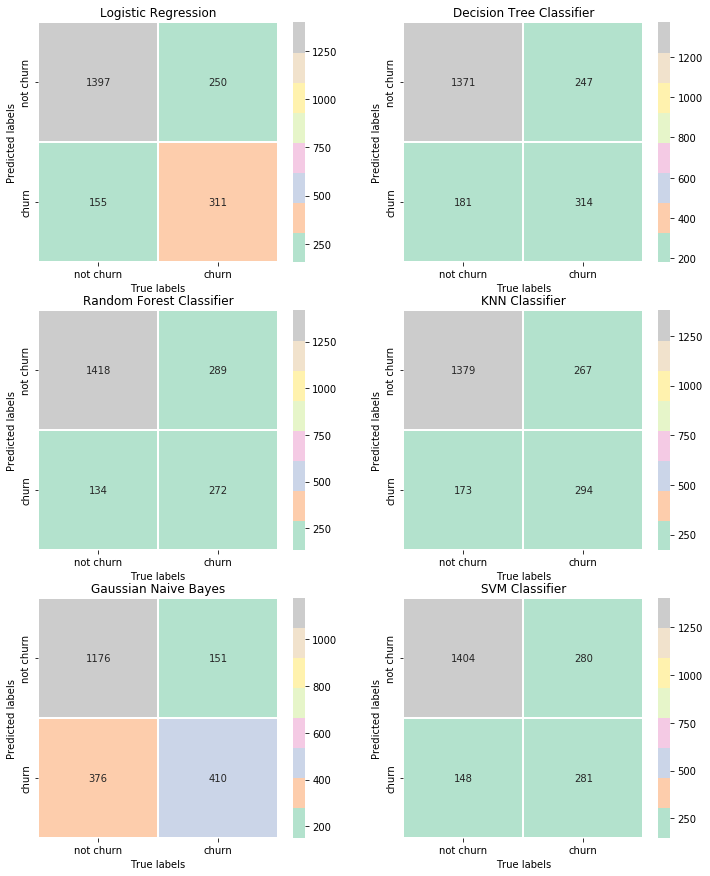

In [35]:
ModelList= [LogReg,DecTree,RanFor,KNN,GNB,SupVC]

Models=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','KNN Classifier','Gaussian Naive Bayes','SVM Classifier']

fig = plt.figure(figsize=(12,15))
for i in range(6):
    ax = plt.subplot(3,2,i+1)
    Model_Predictions = ModelList[i].predict(X_test_Scaled)
    Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
    sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
    ax.set_xlabel('True labels')
    ax.set_ylabel('Predicted labels')
    ax.xaxis.set_ticklabels(["not churn","churn"])
    ax.yaxis.set_ticklabels(["not churn","churn"], va="center")
    b, t = plt.ylim() 
    b += 0.5
    t -= 0.5
    plt.ylim(b, t)
    plt.title(Models[i])

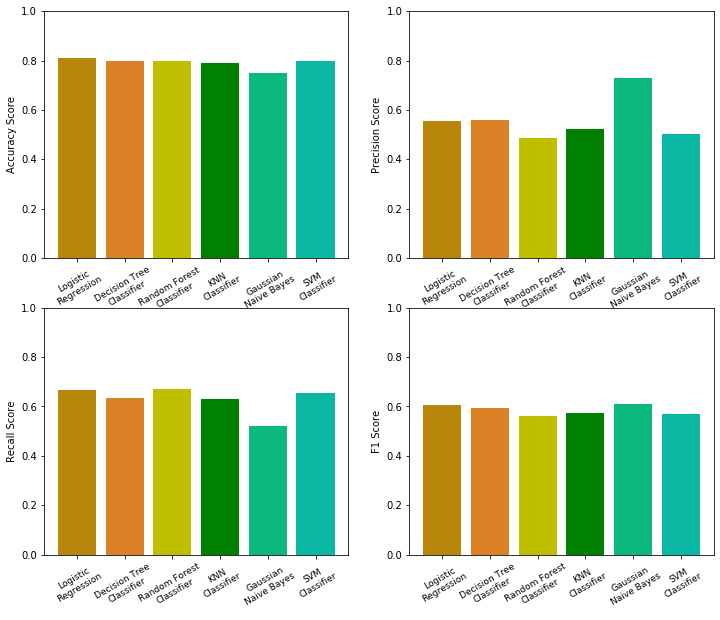

In [26]:
Models2=['Logistic\nRegression','Decision Tree\nClassifier','Random Forest\nClassifier','KNN\nClassifier','Gaussian\nNaive Bayes','SVM\nClassifier']

AccuracyScore=[]
PrecisionScore=[]
RecallScore=[]
F1Score=[]
for k in range(6):
    Model_Predictions = ModelList[k].predict(X_test_Scaled)
    AccuracyScore.append(accuracy_score(Model_Predictions,y_test))
    PrecisionScore.append(precision_score(Model_Predictions,y_test))
    RecallScore.append(recall_score(Model_Predictions,y_test))
    F1Score.append(f1_score(Model_Predictions,y_test))

Scores=[AccuracyScore,PrecisionScore,RecallScore,F1Score]
Labels=['Accuracy Score','Precision Score','Recall Score', 'F1 Score']
fig = plt.figure(figsize=(12,10))
for i in range(4):
    custom_ylim = (0,1)
    ax = plt.subplot(2,2,i+1)
    ax.bar(Models2,Scores[i],color=['#B8860B','#da8025','y','g','#0bb87e','#0bb8a4'])
    plt.setp(ax, ylim=custom_ylim, ylabel=Labels[i])
    plt.xticks(fontsize=9,rotation=30)

### 3.2) ROC Curves and Area Under ROC Curve Scores

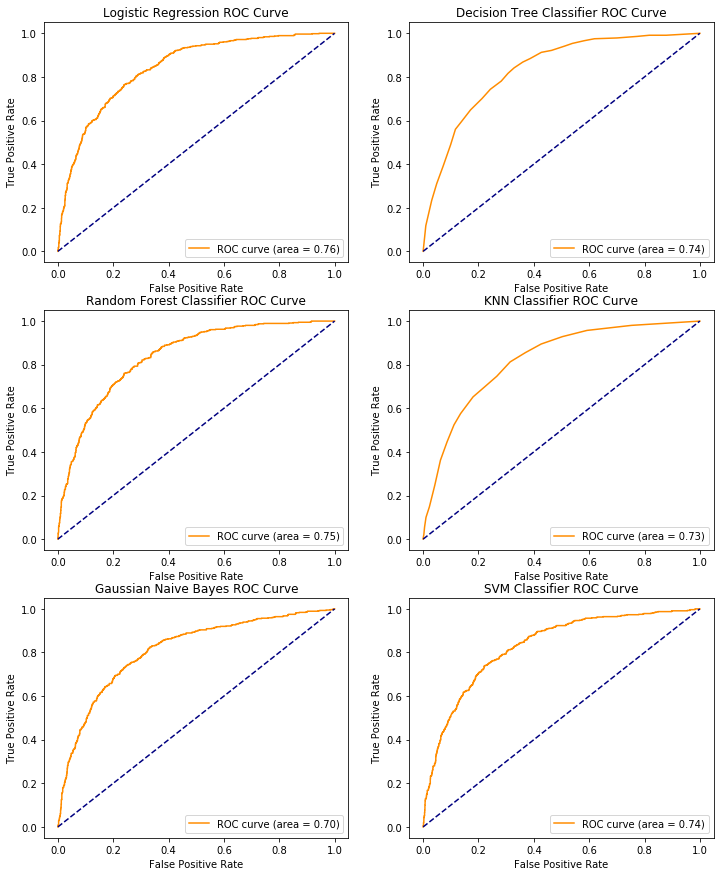

In [46]:
fig = plt.figure(figsize=(12,15))
for i in range(6):
    ax = plt.subplot(3,2,i+1)
    y_score = ModelList[i].predict_proba(X_test_Scaled)
    Model_Predictions = ModelList[i].predict(X_test_Scaled)
    auc_score = roc_auc_score(Model_Predictions,y_test)
    fpr, tpr, _ = roc_curve(y_test, y_score[:,1])
    plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.2f)' %(auc_score))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    ax.set_title(Models[i] + ' ROC Curve')